# Fiber models - comparison of excitability upon intracellular electrical stimulation

- SD curve myelinated for different diameters
- SD curve unmyelinated for different diameters
- comparison SD curves myelinated vs. unmyelinated for few characteristic diameters
- conclusion about influence of myelination and fiber diameter on excitability 

We analyse the excitability of different fiber types for intracellular electrical stimulation of the central node. To characterize it we use strength-duration curves.

We consider myelinated and unmyelinated fibers with variable diameters. The typical values of the diameters are respectively 5-20 um and 0.2-1.5 um (reference). 

###  Imports

In [2]:
import logging
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

from PySONIC.core import PulsedProtocol
from PySONIC.utils import logger, si_format
from MorphoSONIC.core import IntracellularCurrent, UnmyelinatedFiber, strengthDuration 
from MorphoSONIC.plt import strengthDurationCurve, plotFiberDiameterDistributions
from MorphoSONIC.utils import chronaxie

#Folder used to store the strength duration data
outdir='strengthDurationData'

##  Myelinated and unmyelinated fibers

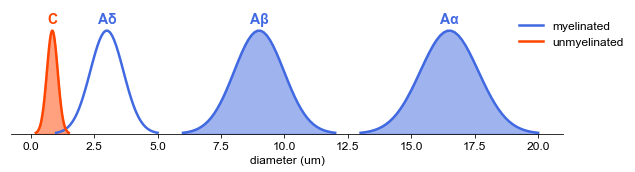

In [3]:
fig = plotFiberDiameterDistributions()

##  Intracellular electrical stimulation

In [3]:
# Stimulation parameters
toffset = 20e-3  # s
n_dur = 10
tstim_range = np.logspace(-5, 0, n_dur)  # s

##  Intracellular electrical stimulation of a myelinated fiber

To model the unmyelinated fiber we use the Reilly model. 
We test the fiber for diameters in the range 5-20 um. 

###  Strength-duration curve varying the fiber diameter

<IPython.core.display.Javascript object>


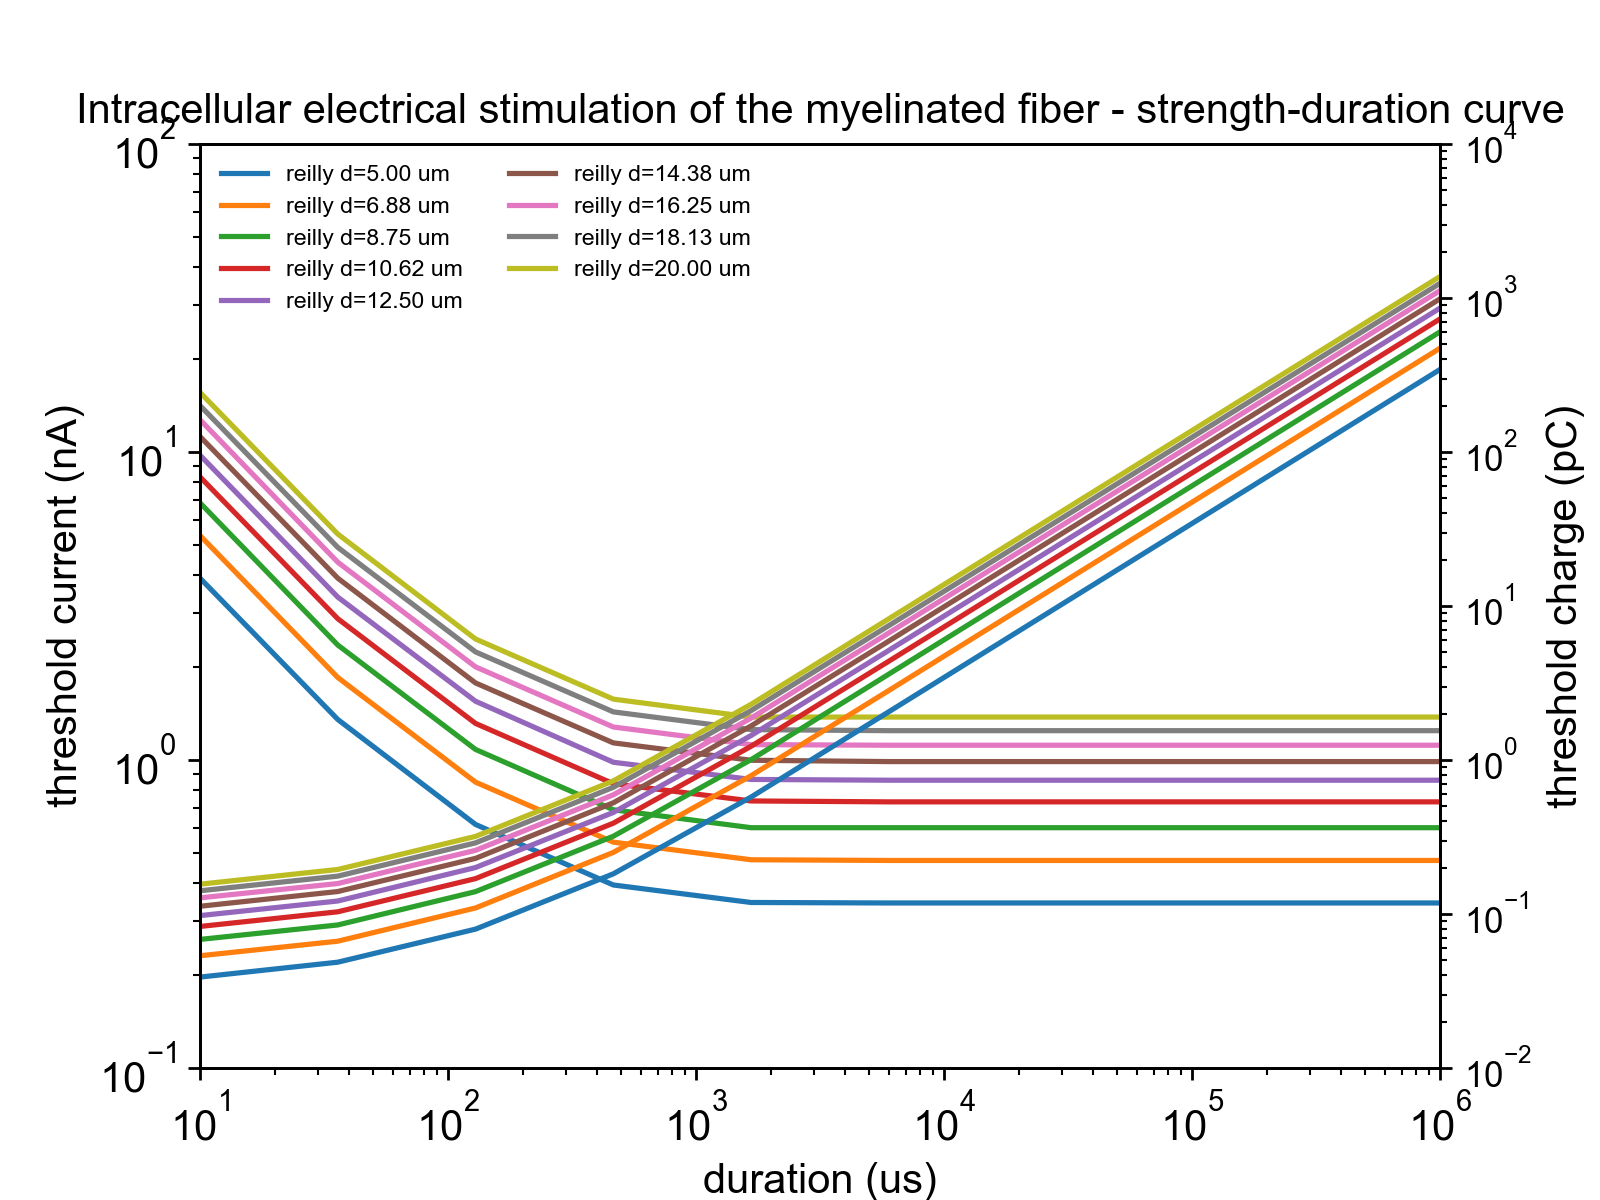

In [6]:
# Fiber parameters
fiberType = 'reilly'
fiberClass = 'intracellular_electrical_stim'
n_dia = 9
diameters = np.linspace(5e-6, 20e-6, n_dia)

Ithr_dict = {}
Qthr_dict = {}
logger.setLevel(logging.WARNING)

for i, fiberD in enumerate(diameters):  
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir)
    Ithr = df.values[:,1]
    Ithr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr = Ithr * tstim_range
    Qthr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr

# Plot strength-duration curve
title = 'Intracellular electrical stimulation of the myelinated fiber'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_dict, thrs2=Qthr_dict,
    yfactor=1e9, y2factor=1e12, scale='log', plot_chr=False,)

- Increasing the diameter of the fibers, increase also the current threshold to obtain the excitation of the fibers. 

##  Intracellular electrical stimulation of a unmyelinated fiber

To model the unmyelinated fiber we use the Sundt model. 
We test the fiber for diameters in the range 0.2-1.5 um. 

###  Strength-duration curve varying the fiber diameter

 06/01/2020 15:30:54: creating model with fiberD = 0.20 um ...
 06/01/2020 15:31:01: running tstim parameter sweep (10.00 us - 1.00 s)
 06/01/2020 15:31:01: parameter sweep successfully completed
 06/01/2020 15:31:01: loading results from log file
 06/01/2020 15:31:01: creating model with fiberD = 0.36 um ...
 06/01/2020 15:31:07: running tstim parameter sweep (10.00 us - 1.00 s)
 06/01/2020 15:31:07: parameter sweep successfully completed
 06/01/2020 15:31:07: loading results from log file
 06/01/2020 15:31:07: creating model with fiberD = 0.53 um ...
 06/01/2020 15:31:12: running tstim parameter sweep (10.00 us - 1.00 s)
 06/01/2020 15:31:12: parameter sweep successfully completed
 06/01/2020 15:31:12: loading results from log file
 06/01/2020 15:31:12: creating model with fiberD = 0.69 um ...
 06/01/2020 15:31:17: running tstim parameter sweep (10.00 us - 1.00 s)
 06/01/2020 15:31:17: parameter sweep successfully completed
 06/01/2020 15:31:17: loading results from log file
 06/01/2

<IPython.core.display.Javascript object>


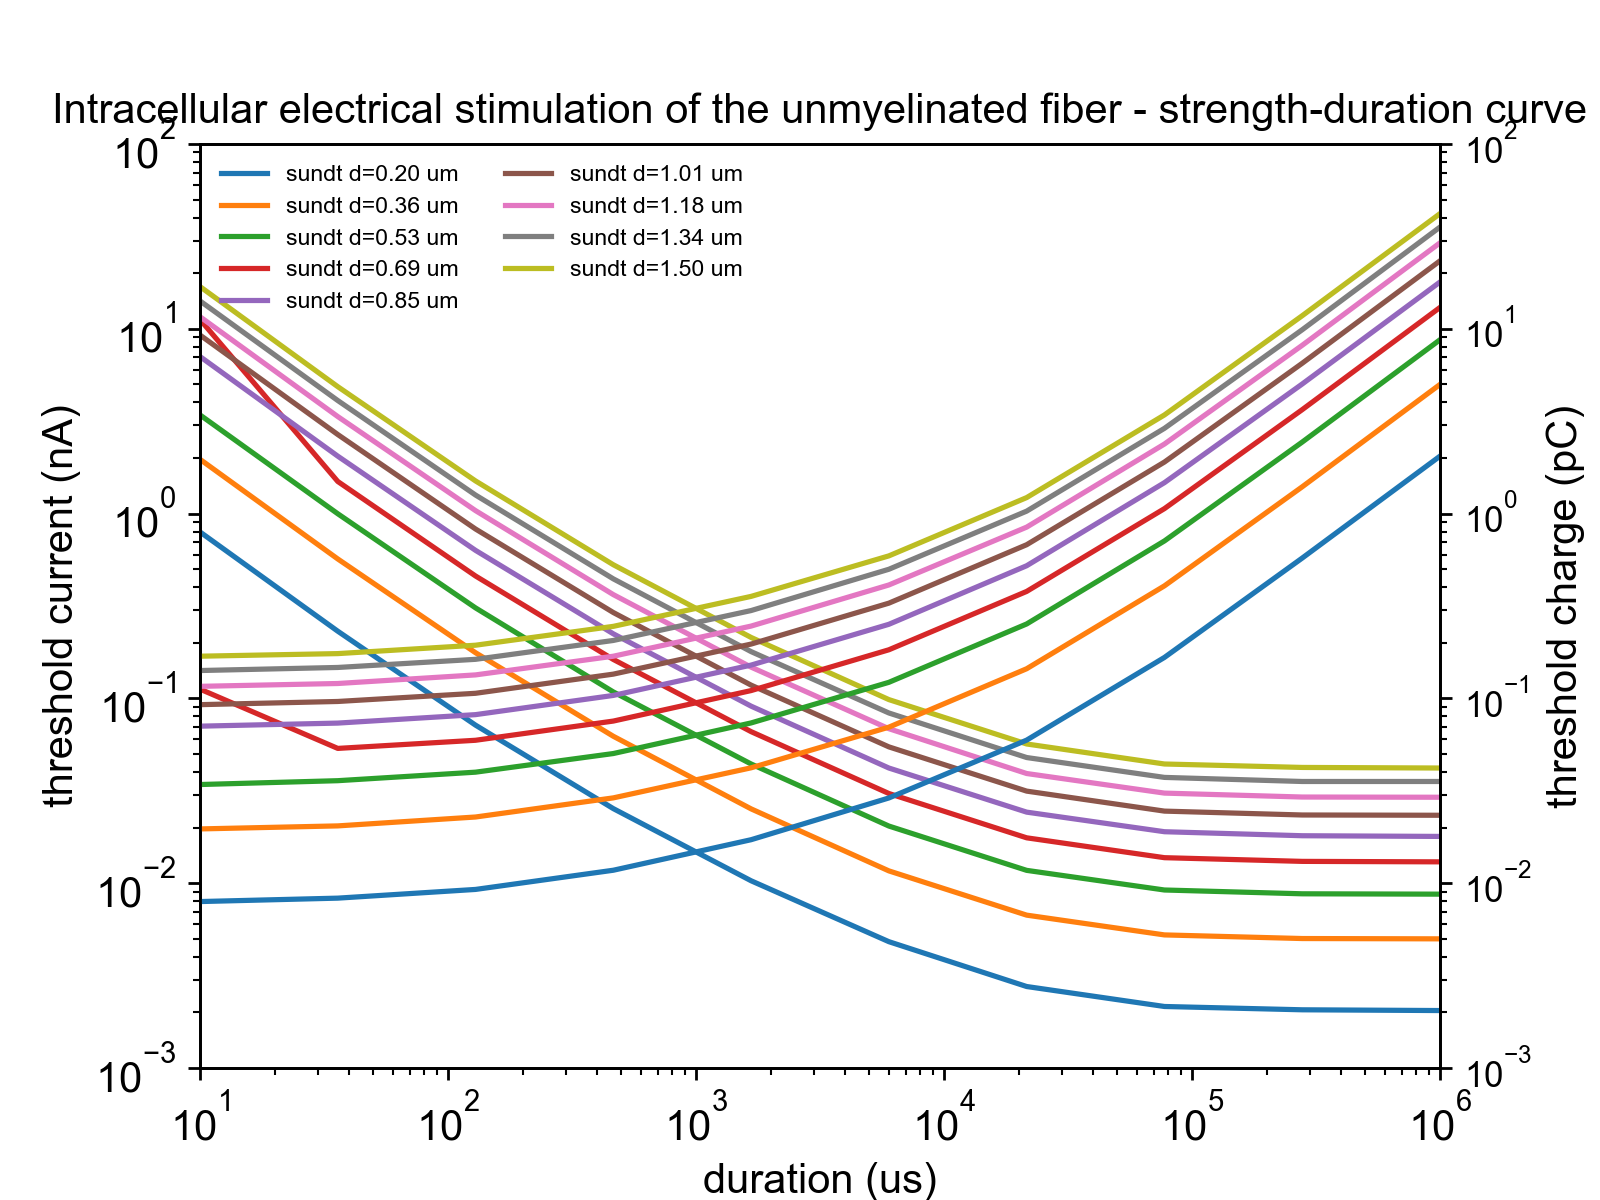

In [5]:
# Fiber parameters
fiberType = 'sundt'
fiberClass = 'intracellular_electrical_stim'
n_dia = 9
diameters= np.linspace(0.2e-6, 1.5e-6, n_dia)

Ithr_dict = {}
Qthr_dict = {}
logger.setLevel(logging.INFO)

for i, fiberD in enumerate(diameters):  
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir)
    Ithr = df.values[:,1]
    Ithr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr = Ithr * tstim_range
    Qthr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr

# Plot strength-duration curve
title = 'Intracellular electrical stimulation of the unmyelinated fiber'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_dict, thrs2=Qthr_dict,
    yfactor=1e9, y2factor=1e12, scale='log', plot_chr=False)

- Increasing the diameter of the fibers, increase also the current threshold to obtain the excitation of the fibers. 

## Comparison between myelinated and unmyelinated fibers

In [4]:
Ithr_dict = {}
Qthr_dict = {}
logger.setLevel(logging.WARNING)

# Type of stimulation
fiberClass = 'intracellular_electrical_stim'

#Myelinated fiber
fiberType = 'reilly'
n_dia = 3
diameters_myel = np.linspace(5e-6, 20e-6, n_dia)

for i, fiberD in enumerate(diameters_myel):  
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir)
    Ithr = df.values[:,1]
    Ithr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr = Ithr * tstim_range
    Qthr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr

# Unmyelinated fiber 
fiberType = 'sundt'
diameters_unmyel = np.linspace(0.2e-6, 1.5e-6, n_dia)

for i, fiberD in enumerate(diameters_unmyel):  
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir)
    Ithr = df.values[:,1]
    Ithr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Ithr
    Qthr = Ithr * tstim_range
    Qthr_dict[f'{fiberType} d={(fiberD*1e6):.2f} um'] = Qthr

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


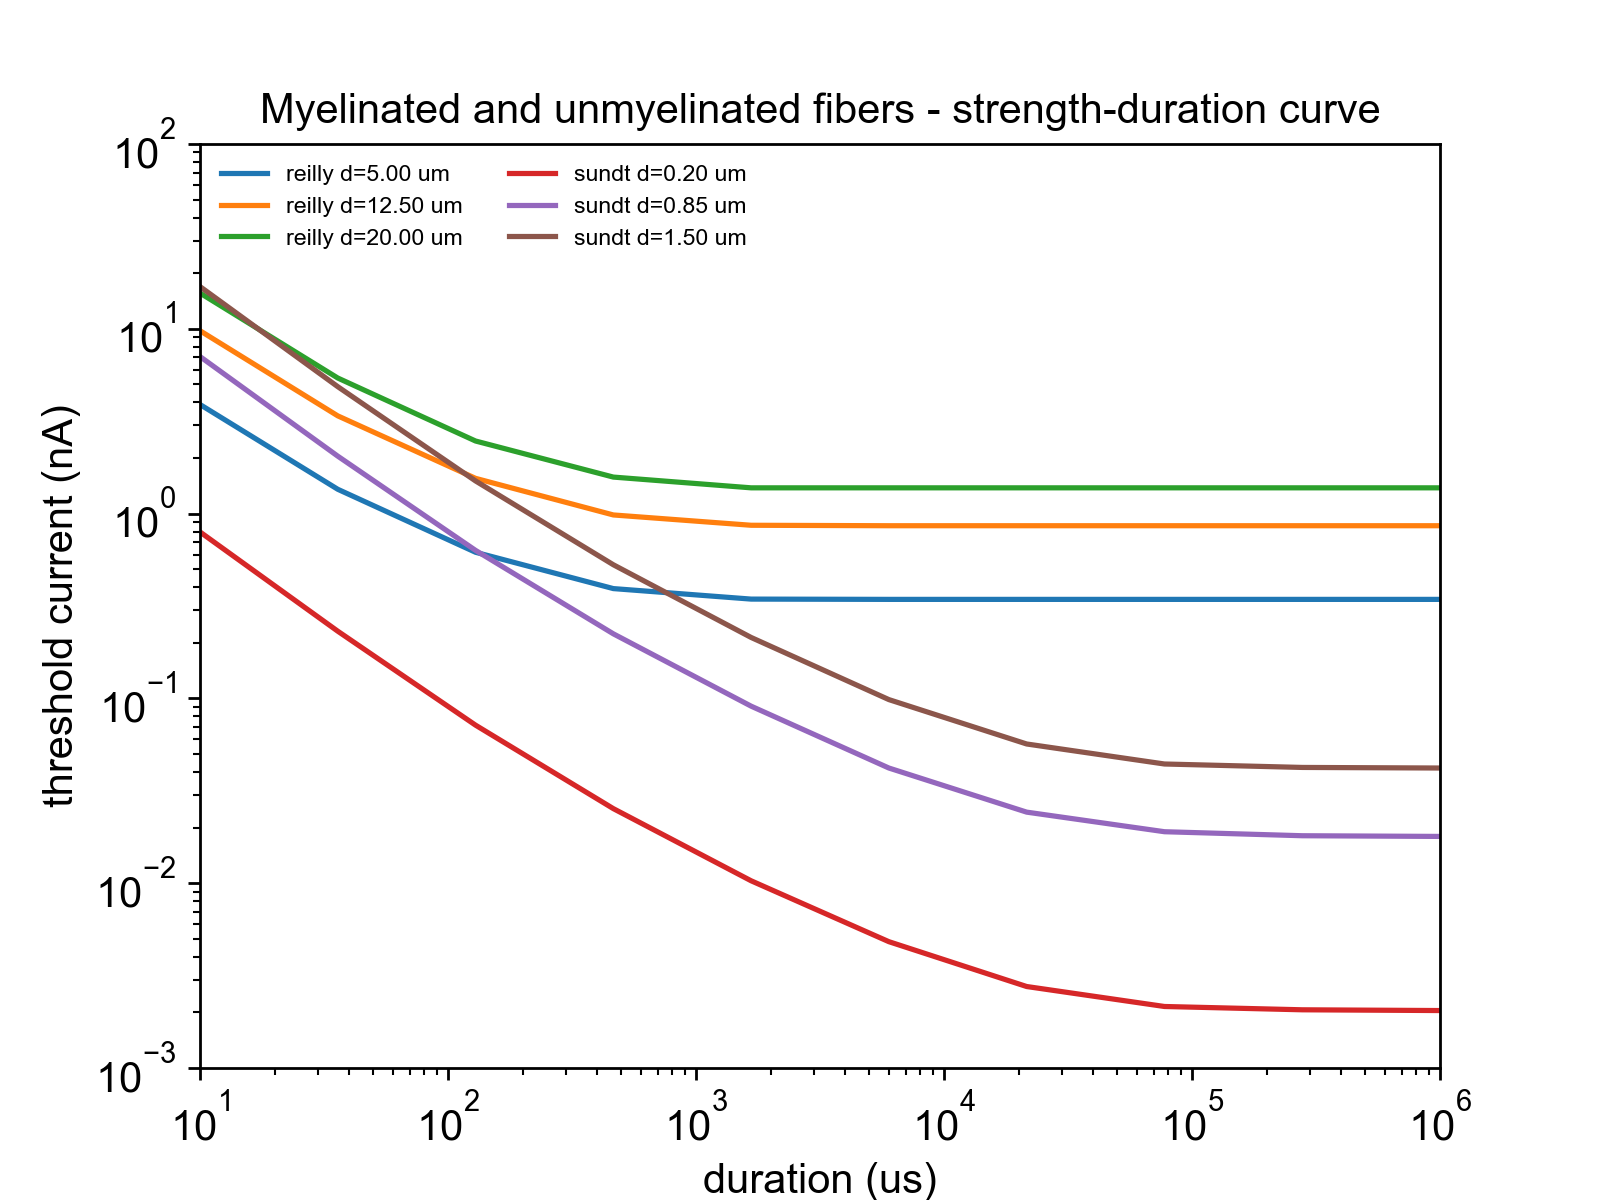

In [6]:
# Plot current-duration curve
title = 'Myelinated and unmyelinated fibers'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Ithr_dict,
    yfactor=1e9, scale='log', plot_chr=False)

- Myelinated fibers have an higher rheobase current.
- The elbow of the myelinated fibers is at lower stimulus duration, compared to the elbow of the unmyelinated fibers.

<IPython.core.display.Javascript object>


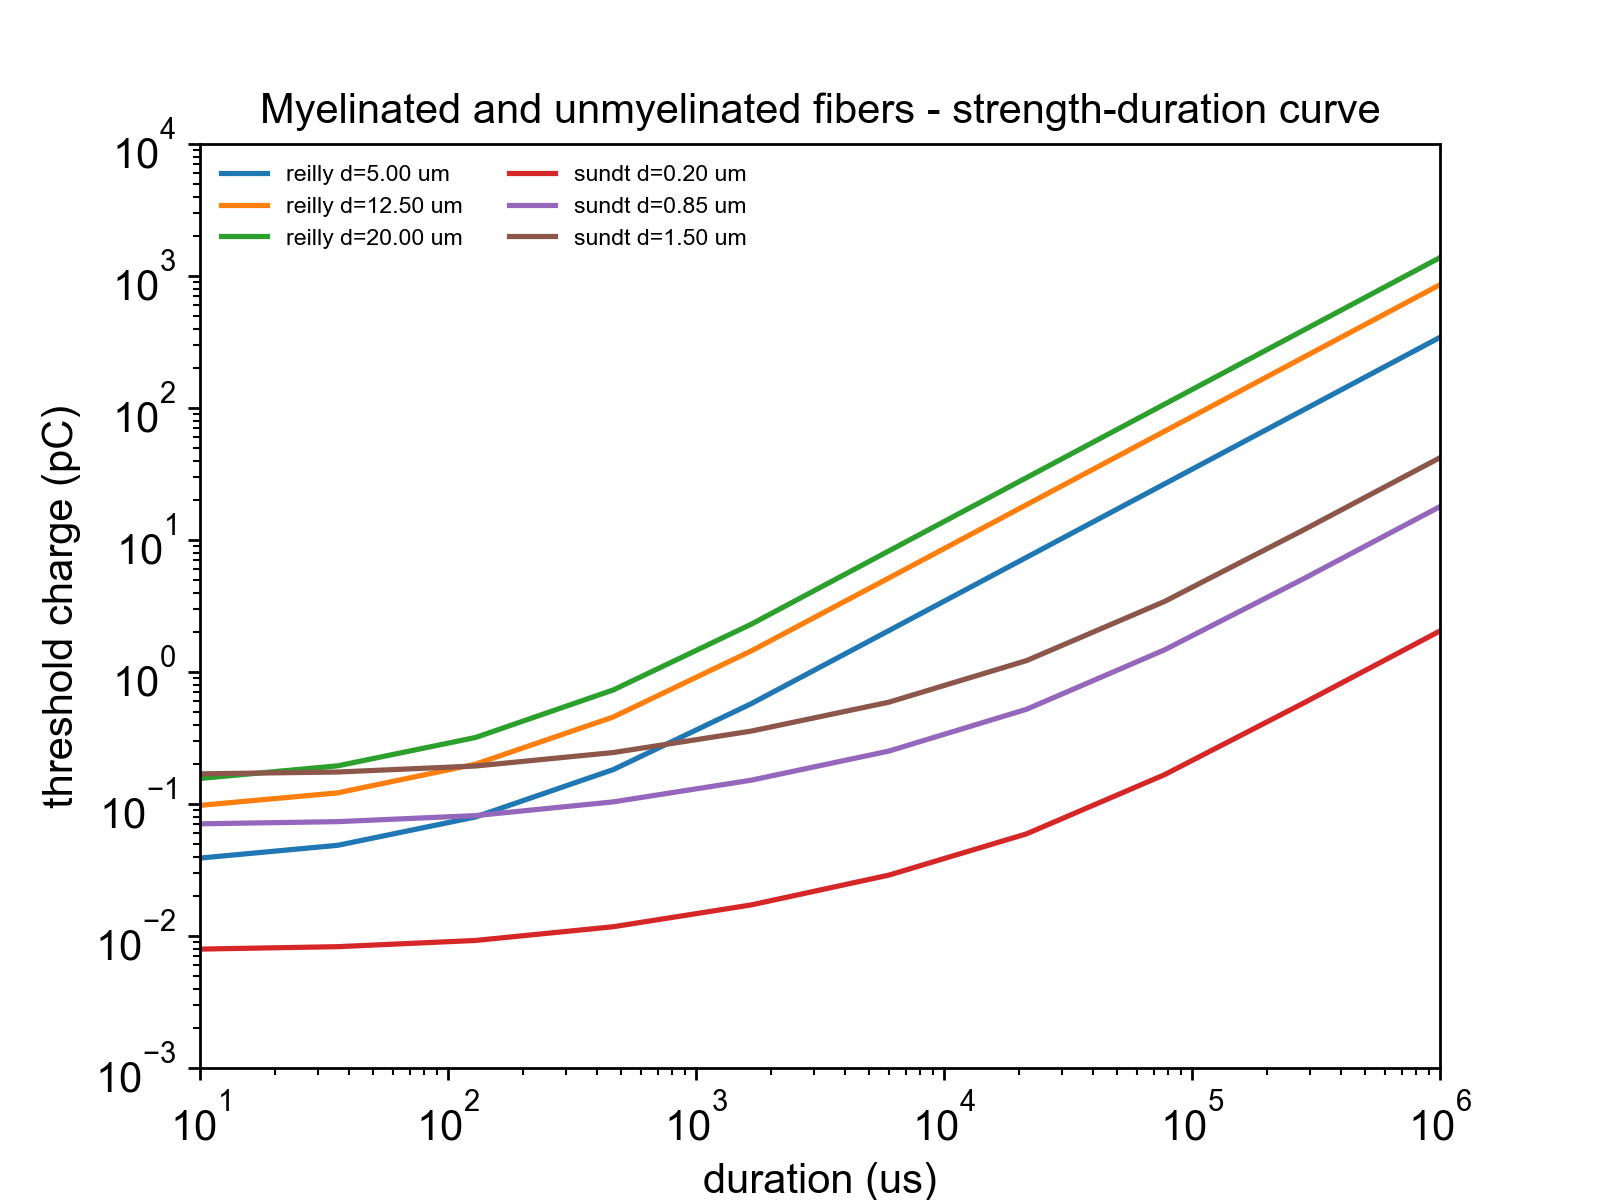

In [7]:
# Plot charge-duration curve
title = 'Myelinated and unmyelinated fibers'
%matplotlib notebook
fig2 = strengthDurationCurve(
    title, tstim_range, Qthr_dict,
    yname='charge', yfactor=1e12, yunit='C',
    scale='log', plot_chr=False)

- The rheobase charge (threshold charge for low durations) is almost the same between myelinated and unmyelinted fibers.
- Te behavior differs at higher stimulus durations: the elbow of the myelinated fibers is at lower stimulus duration, compared to the elbow of the unmyelinated fibers.

## Extraction of parameters to characterize the fibers' behaviours

In [60]:
logger.setLevel(logging.WARNING)

# Type of stimulation
fiberClass = 'intracellular_electrical_stim'

#Myelinated fiber
fiberType = 'reilly'
n_dia = 9
diameters_myel = np.linspace(5e-6, 20e-6, n_dia)
Irh_myel = np.zeros(n_dia)
Qrh_myel = np.zeros(n_dia)
chr_myel = np.zeros(n_dia)

for i, fiberD in enumerate(diameters_myel):  
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir)
    Ith = df.values[:,1]              # current thresholds for different stimulus duration
    Irh_myel[i] = Ith.min()           # rheobase current
    Qth = Ith * tstim_range           # charge thresholds for different stimulus duration
    Qrh_myel[i] = Qth.min()           # rheobase charge 
    chr_myel[i] = chronaxie(tstim_range, Ith)   #chronaxie
tau_myel = Qrh_myel / Irh_myel                  # fiber time constant
    
# Unmyelinated fiber 
fiberType = 'sundt'
diameters_unmyel = np.linspace(0.2e-6, 1.5e-6, n_dia)
Irh_unmyel = np.zeros(n_dia)
Qrh_unmyel = np.zeros(n_dia)
chr_unmyel = np.zeros(n_dia)

for i, fiberD in enumerate(diameters_unmyel):  
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset, outdir)
    Ith = df.values[:,1]              # threshold currents for different stimulus duration
    Irh_unmyel [i] = Ith.min()        # rheobase current
    Qth = Ith * tstim_range           # charge thresholds for different stimulus duration
    Qrh_unmyel[i] = Qth.min()         # rheobase charge 
    chr_unmyel[i] = chronaxie(tstim_range, Ith)   #chronaxie
tau_unmyel = Qrh_unmyel / Irh_unmyel              # fiber time constant

## Rheobase current

<IPython.core.display.Javascript object>


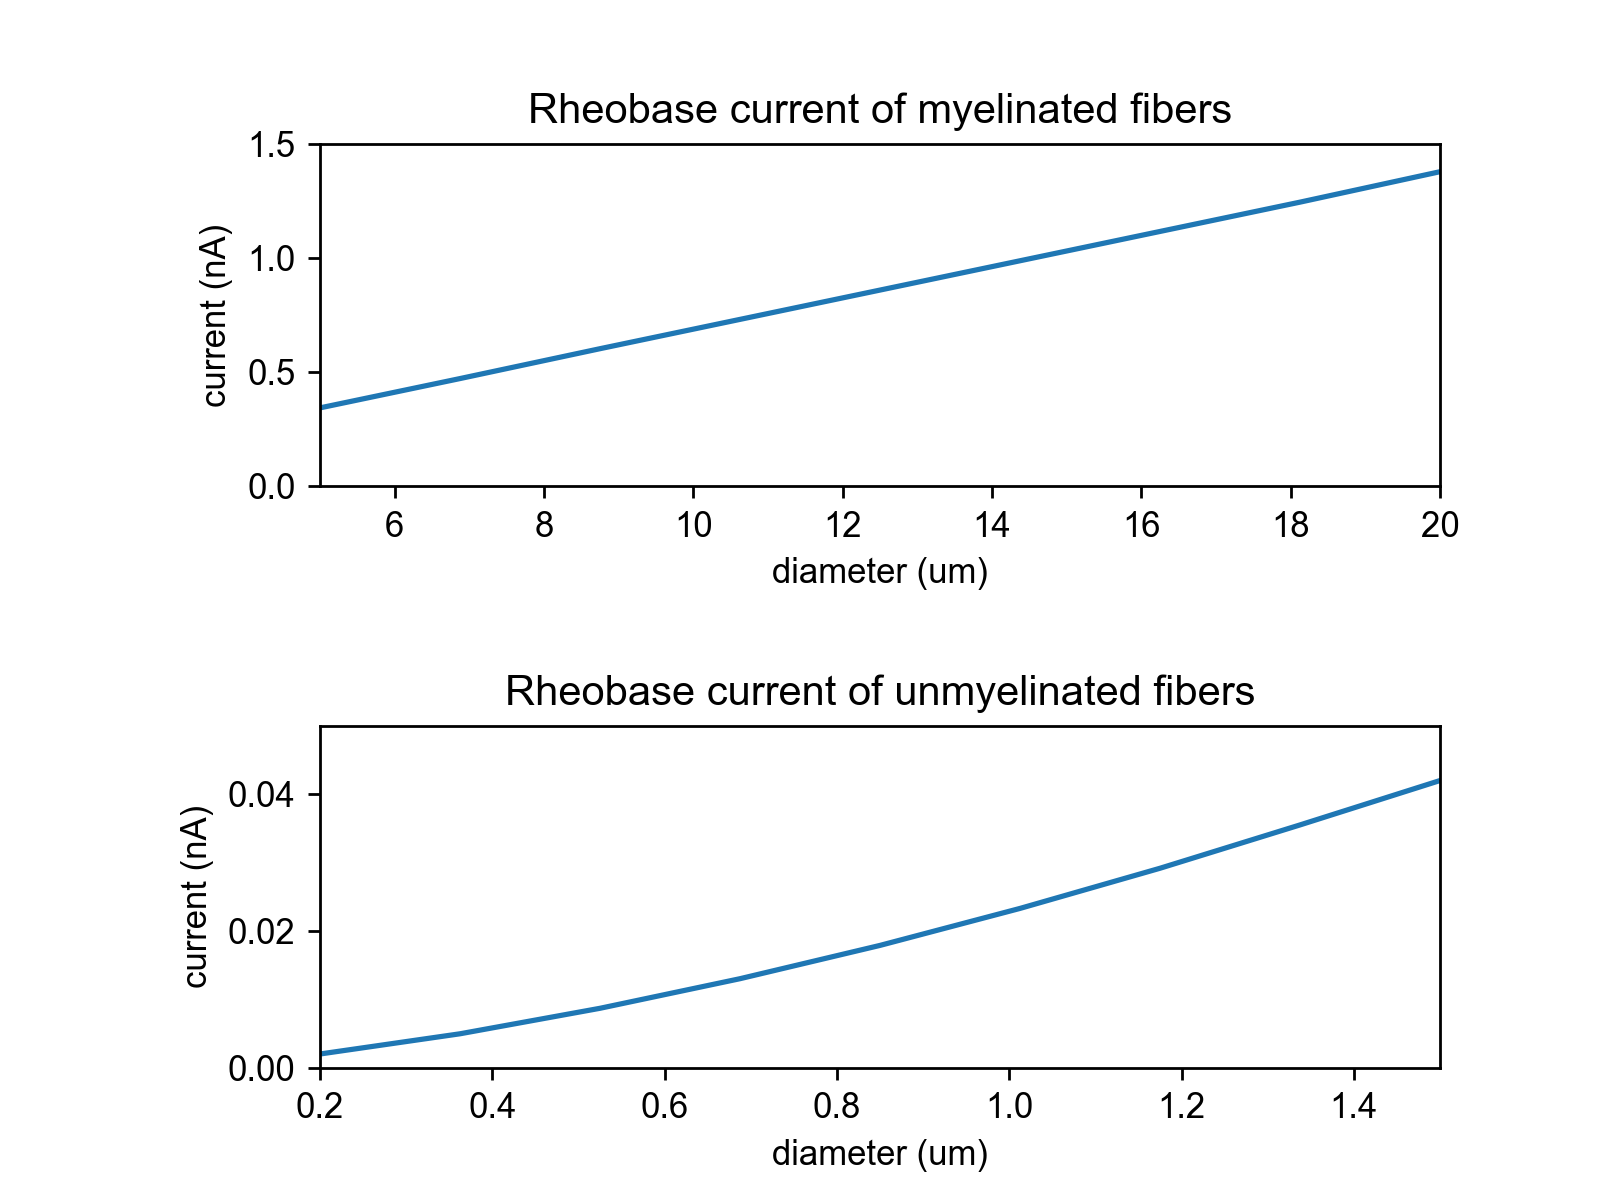

In [61]:
# Rheobase current plot varying the fiber diameter
%matplotlib notebook
fig, axes = plt.subplots(2,1)
plt.subplots_adjust(left = 0.2, hspace=0.7)
ax=axes[0]
ax.set_title('Rheobase current of myelinated fibers')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('current (nA)')
ax.set_xlim(5, 20)
ax.set_ylim(0, 1.5)
ax.plot (diameters_myel*1e6, Irh_myel*1e9)
ax=axes[1]
ax.set_title('Rheobase current of unmyelinated fibers')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('current (nA)')
ax.set_xlim(0.2, 1.5)
ax.set_ylim(0, 5e-2)
ax.plot (diameters_unmyel*1e6, Irh_unmyel*1e9)

- The relation between rheobase current and diameter is linear. 
- The rheobase current for unmyelinated fibers is about one order of magnitude less than the one of myelinated fibers. This big difference is probably due to both the difference in the diameter range and the difference in the fiber dynamics (from the observation of the strength duration plot: elbow position).

## Rheobase charge

<IPython.core.display.Javascript object>


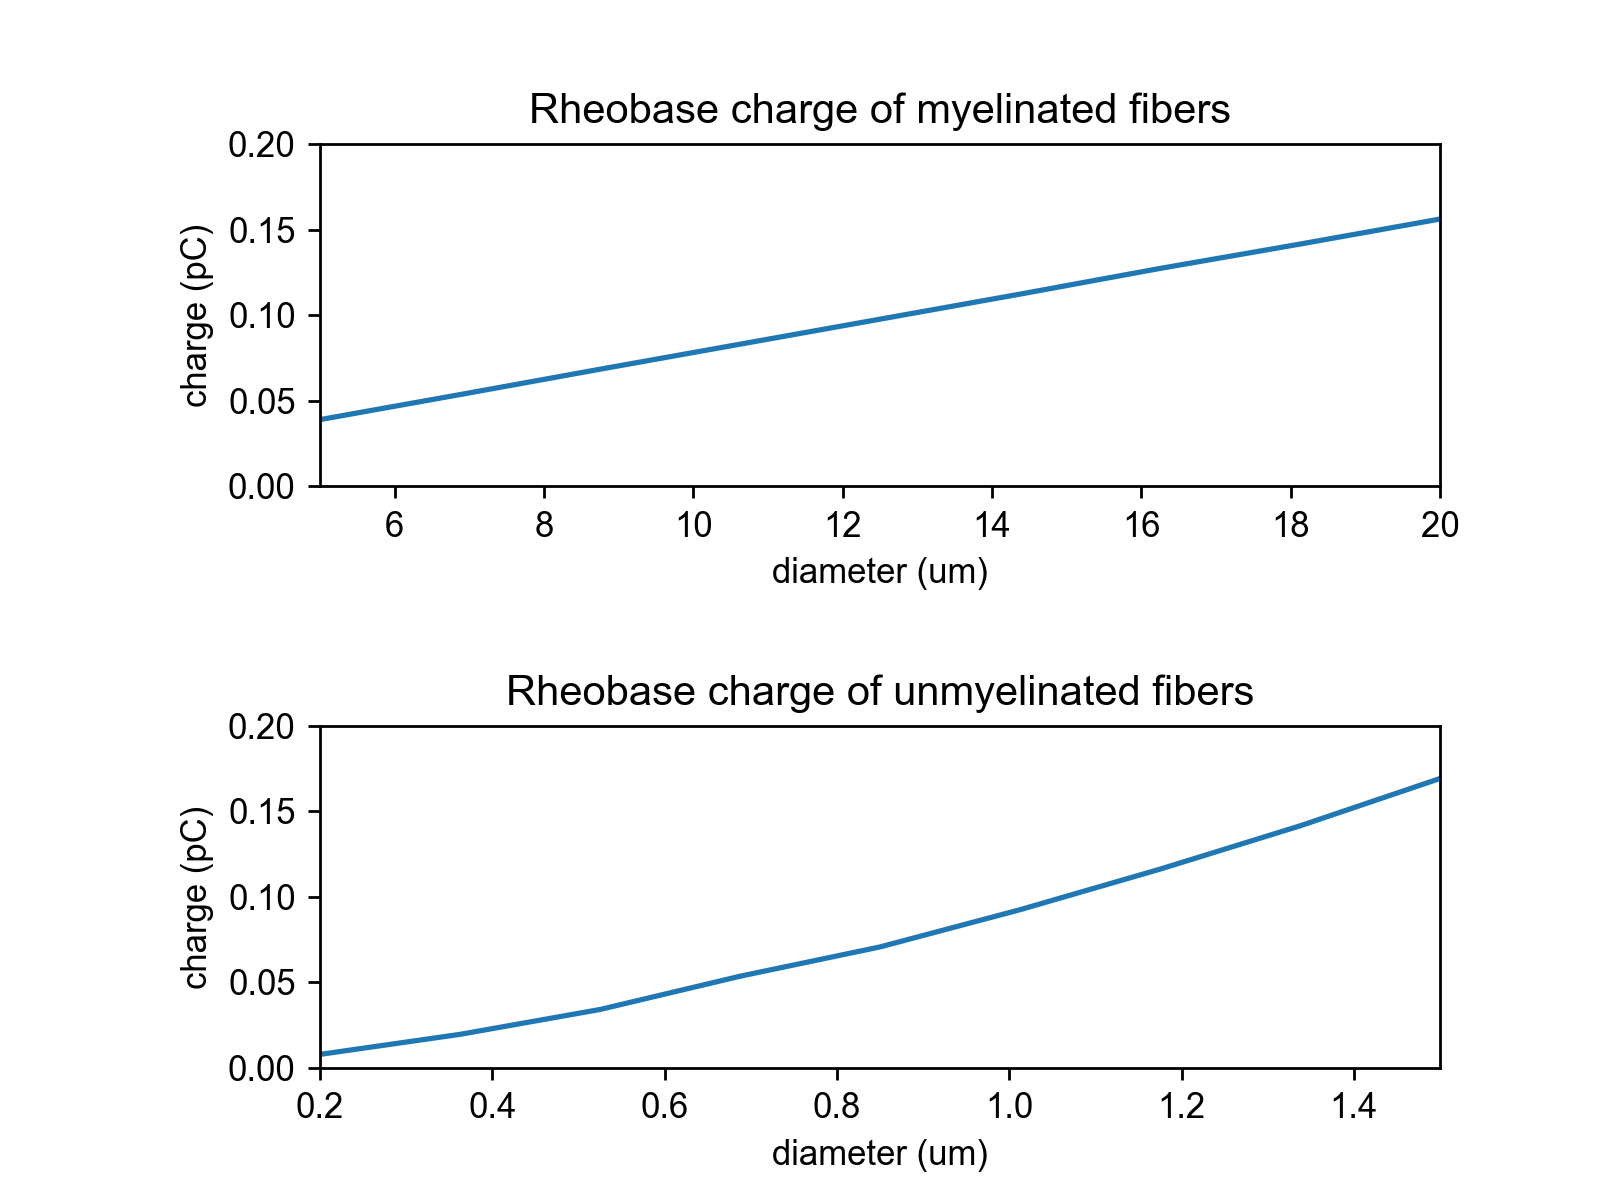

In [62]:
# Rheobase charges plot varying the fiber diameter
%matplotlib notebook
fig, axes = plt.subplots(2,1)
plt.subplots_adjust(left = 0.2, hspace=0.7)
ax=axes[0]
ax.set_title('Rheobase charge - myelinated fibers')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('charge (pC)')
ax.set_xlim(5, 20)
ax.set_ylim(0, 2e-1)
ax.plot (diameters_myel*1e6, Qrh_myel*1e12)
ax=axes[1]
ax.set_title('Rheobase charge - unmyelinated fibers')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('charge (pC)')
ax.set_xlim(0.2, 1.5)
ax.set_ylim(0, 2e-1)
ax.plot (diameters_unmyel*1e6, Qrh_unmyel*1e12)

- The relation between rheobase charge and diameter is linear. 
- The rheobase charge for unmyelinated and myelinated fibers is in the same order of magnitude.

## Rheobase time constant

<IPython.core.display.Javascript object>


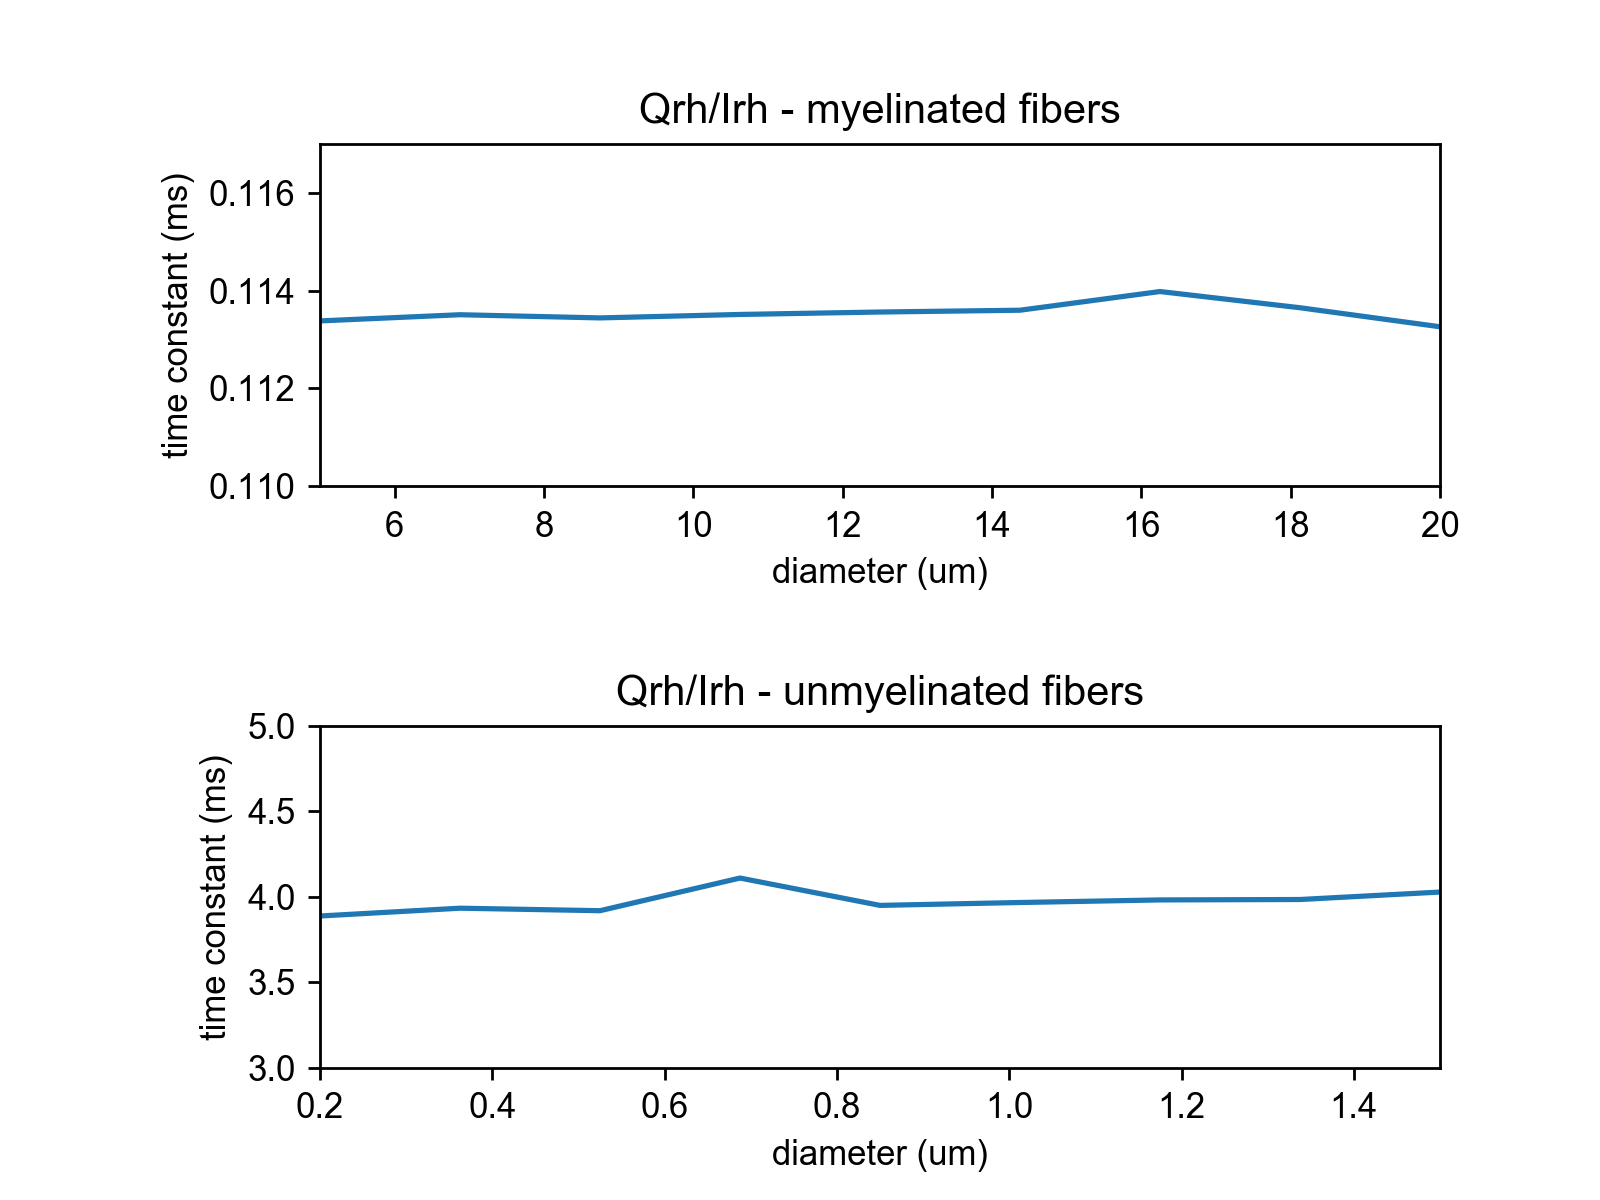

In [65]:
# Time constant plot varying the fiber diameter
%matplotlib notebook
fig, axes = plt.subplots(2,1)
plt.subplots_adjust(left = 0.2, hspace=0.7)
ax=axes[0]
ax.set_title('Qrh/Irh - myelinated fibers')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('time constant (ms)')
ax.set_xlim(5, 20)
ax.set_ylim(0.11, 0.117)
ax.plot (diameters_myel*1e6, tau_myel*1e3)
ax=axes[1]
ax.set_title('Qrh/Irh - unmyelinated fibers')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('time constant (ms)')
ax.set_xlim(0.2, 1.5)
ax.set_ylim(3, 5)
ax.plot (diameters_unmyel*1e6, tau_unmyel*1e3)

- The rheobase time constant doesn't depend on the diameter of the fiber. 
- The time constant of unmyelinated fibers is more than one order of magnitude higher that the one of myelinated fibers.

## Cronaxie

<IPython.core.display.Javascript object>


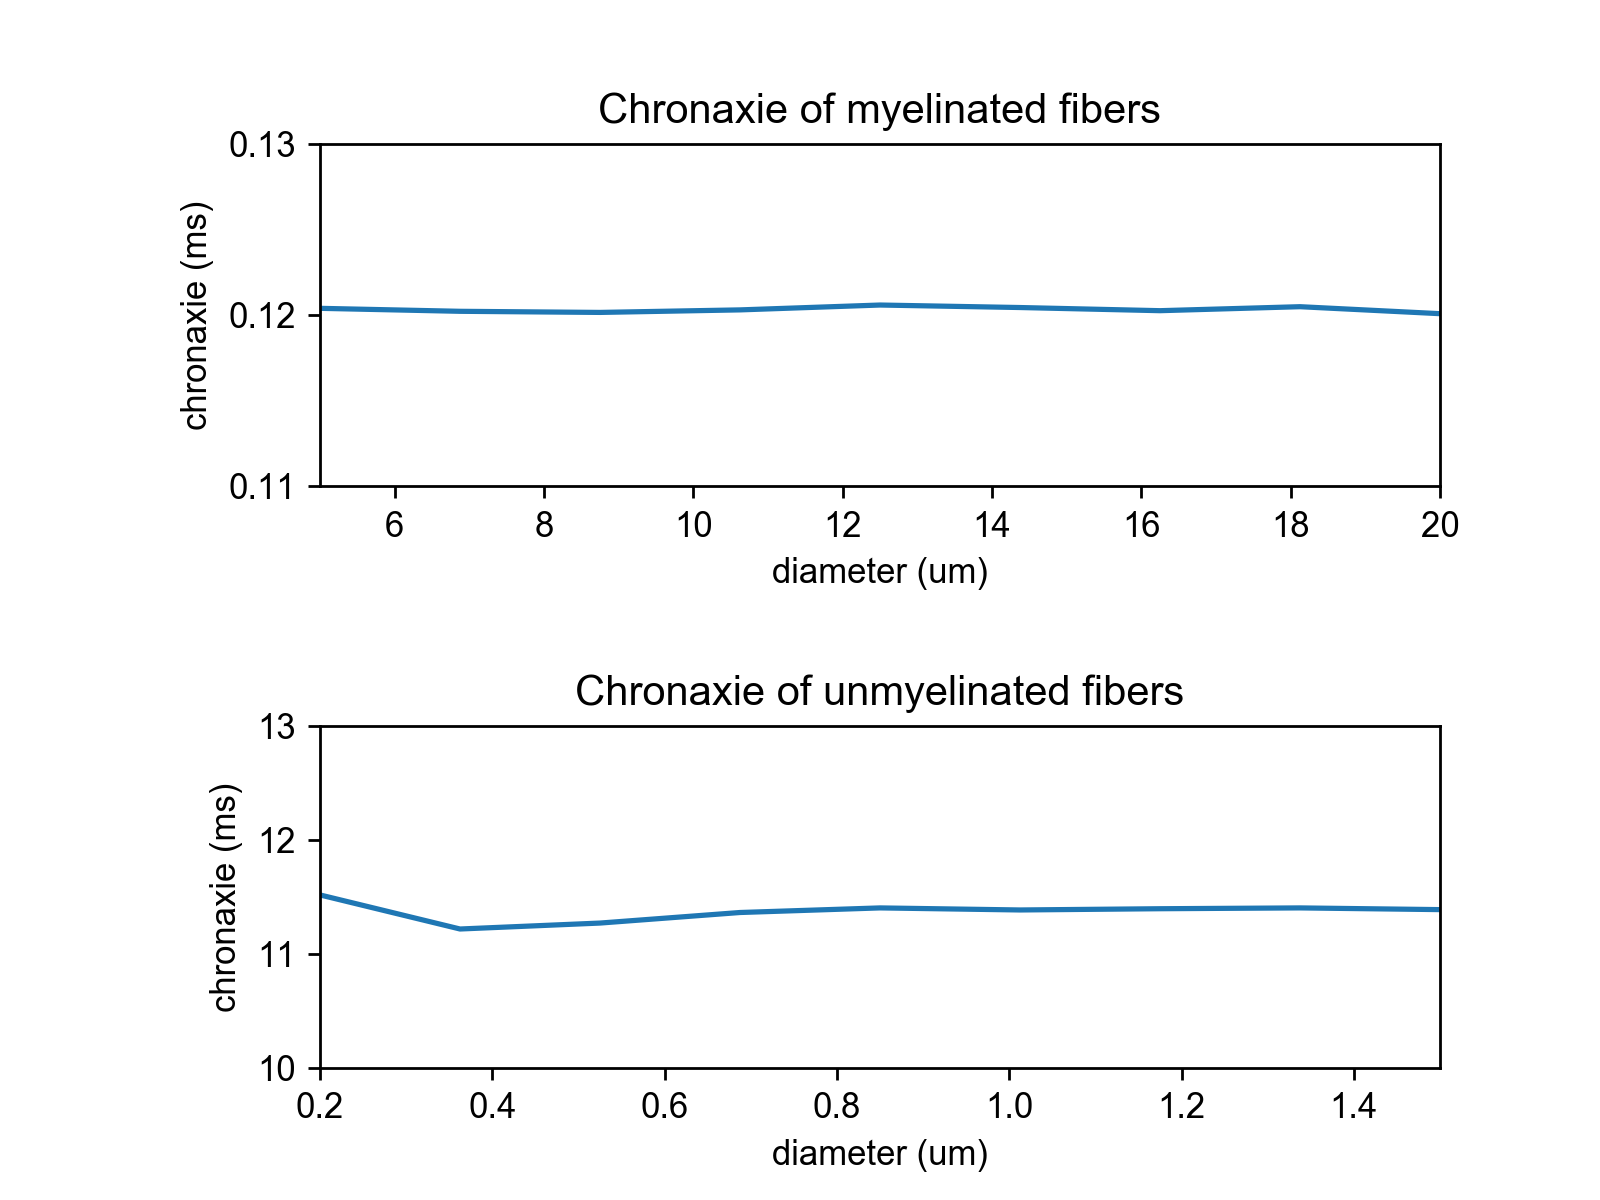

In [64]:
%matplotlib notebook
fig, axes = plt.subplots(2,1)
plt.subplots_adjust(left = 0.2, hspace=0.7)
ax=axes[0]
ax.set_title('Chronaxie of myelinated fibers')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('chronaxie (ms)')
ax.set_xlim(5, 20)
ax.set_ylim(1.1e-1, 1.3e-1)
ax.plot (diameters_myel*1e6, chr_myel*1e3)
ax=axes[1]
ax.set_title('Chronaxie of unmyelinated fibers')
ax.set_xlabel('diameter (um)')
ax.set_ylabel('chronaxie (ms)')
ax.set_xlim(0.2, 1.5)
ax.set_ylim(10, 13)
ax.plot (diameters_unmyel*1e6, chr_unmyel*1e3)

- The chronaxie doesn't depend on the diameter of the fiber. 
- The chronaxie of unmyelinated fibers is about one order of magnitude higher that the one of myelinated fibers.

## Conclusions

###  References

- Reilly, J.P., Freeman, V.T., and Larkin, W.D., *Sensory effects of transient electrical stimulation--evaluation with a neuroelectric model*, IEEE Trans Biomed Eng 32, 1001–1011, 1985.
- Sundt D, Gamper N, Jaffe DB., *Spike propagation through the dorsal root ganglia in an unmyelinated sensory neuron: a modeling study*, J Neurophysiol 114: 3140–3153, 2015.